#Classificação


Não existe um fator de magnitude <br>
A variavel resposta é discretizada, não havendo uma ordem de grandeza. <br>
Atributos categoricos.<br>
É necessario um tratamento dos dados. <br>

Matriz de features e matriz respostas ( Target )


## Regressção Logística 

Aplicação da função sigmoid visando determinado limite para função. Varia de 0 a 1 . 
Serve para pegar valores superios e inveriores aos limites e aproximá-los aos limites 0 e 1.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
#parâmetros de plots
import matplotlib
matplotlib.rcParams ['mathtext.fontset'] = 'stix'
matplotlib.rcParams ['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

dataset = pd.read_csv('https://s3.amazonaws.com/pycourse/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
#Analise Exploratória

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [54]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
#Extrair as matrizes X de features e y para o label

X = dataset.iloc[:,2:4].values  #salva as colunas ang e salario em um matriz n por 2  
y = dataset.iloc[:, -1].values

In [56]:
#Verificação

print('X = \n')
print(X[:5, :])

X = 

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [0]:
#Dividir em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y) #random embaralha #stratify mantem proporcional a divisão das labels

In [0]:
#Esclar e normalizar os dados. 

#Normalizando as variaveis

from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [60]:
X_train = sc.fit_transform(X_train)  #Fit é somente para treino na base de dados de treino
X_teste = sc.transform(X_teste) # Aplica a formula no dado
print(X_train[:5, :])



[[ 0.21949759  0.16166651]
 [ 0.21949759  0.07369804]
 [-1.29864134 -1.36312043]
 [ 1.8325202   0.13234369]
 [-0.82422293 -1.2165063 ]]


In [0]:
#Fit no modelo 

from sklearn.linear_model import LogisticRegression


In [0]:
classifier = LogisticRegression(random_state=0)

In [63]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Predição no dataset de test

y_pred = classifier.predict(X_teste)

In [65]:
#Verificação simples
print('y_teste: ', y_teste[:10])
print('y_pred: ', y_pred[:10])

y_teste:  [0 1 0 1 1 0 0 1 0 0]
y_pred:  [0 1 0 0 1 0 0 0 0 0]


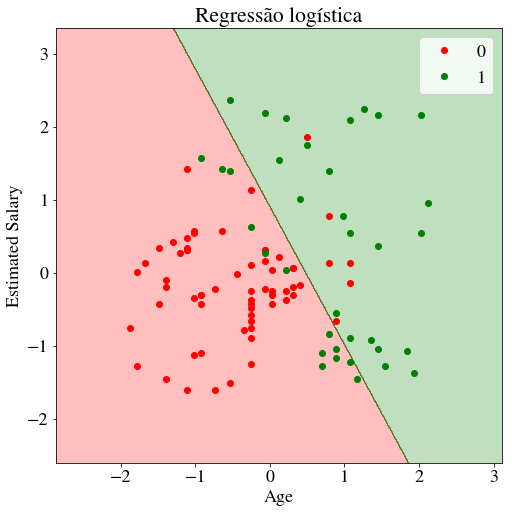

In [66]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))
X_set, y_set = X_teste, y_teste
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.plot(X_set[y_set == j, 0], X_set[y_set == j, 1],'o',
                 c=ListedColormap(('red', 'green'))(i),label=j)
plt.title('Regressão logística')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix

In [68]:
#Avaliar a qualidade do modelo

C = confusion_matrix(y_teste, y_pred)

print('Matriz de confusao: \n')
print(C)

Matriz de confusao: 

[[58  6]
 [13 23]]
